#  Data Analysis_1


By: Anish Kumar  
 [My Github profile](https://github.com/Anish-kr)

In this project,my aim is to analyse the three csv files-
* Enrollment.csv
* Engagement.csv
* project_submission.csv

These files include the enrollment data, engagement data and project submissions data of the students of Udacity. 


This project involves basic analysis in python.

Let's start with importing all the required libraries


In [3]:
import unicodecsv
from datetime import datetime as dt

%pylab inline
import matplotlib.pyplot as plt



Populating the interactive namespace from numpy and matplotlib


Next let us import all the data and store in a suitable variable.  
For this let us define a function that shall ease our work. 


In [4]:

def read_csv(filename):
    with open(filename,'rb') as f:
        reader= unicodecsv.DictReader(f)
        return list(reader)
        

Now importing data using the defined function

In [5]:
enrollments= read_csv('enrollments.csv')
daily_engagements= read_csv('daily_engagement.csv')
project_submissions= read_csv('project_submissions.csv')



Let us a print a sample of the read data

In [6]:
print enrollments[0]  

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [7]:
print daily_engagements[0]  

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


In [8]:
print project_submissions[0]

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


But we find that all values are by default string values which is not suitable. We'll have to fix their datatypes as required.

In [9]:
#defining function for fixing date datatypes
def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d' )
    
    
#function for fixing integer datatypes
def parse_maybe_int(i):
    if i=='':
        return None
    else:
        return int(i)   




In [10]:
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    

In [11]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagements:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

In [12]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

In [13]:
print enrollments[0]
print daily_engagements[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [14]:
print len(enrollments)
print len(daily_engagements)
print len(project_submissions)

1640
136240
3642


In [15]:
#Equalizing the header namein all lists
for data in daily_engagements:
    data['account_key']= data['acct']
    del[data['acct']]

In [16]:
#to make sure the change is applied
daily_engagements[0]['account_key']

u'0'

***********************************************************************************************************************


**Now let us see what questions can we answer using this data**  
 1) How long does it take students to submit their first project?  
 2) How do students who pass differ from those who don't ?  
 3) On an average How many lessons were completed by those who passed?  
 4) what was the daily engagement ofthose who passed?  
 5) Which all lessons were surely taken up by those who passed?  
 6) Which lessons were taken by those who could not complete?    
 7) In which month most students passed?  
 8) In which year most students passed?  
 9) How many were such students who passed with distinction?  
 10) What ws the peculiarity about them?  
 

These are some of the many question we can answer using the obtained data. Let us try to solve them one by one.

** But first we'll have to make sure that there are no unwanted data in our dataset! For that let us first investigate our dataset and look for any surprising points**

#### Data cleaning Phase

In [17]:
#First finding the unique no of students enrolled. As one particular student may have enrolled and 
#again cancelled and agian enrolled. So it's important we find the unique no.

def unique_students(data):
    uni_st = set()
    for datapoint in data:
        uni_st.add(datapoint['account_key'])
    return uni_st

print "Unique_enrolled_Students",len(unique_students(enrollments))
print "Unique_no_of_projects_submitted",len(unique_students(project_submissions))
print "Unique_no_of_students_engaged",len(unique_students(daily_engagements))

Unique_enrolled_Students 1302
Unique_no_of_projects_submitted 743
Unique_no_of_students_engaged 1237


In [18]:
Unique_enrolled_Students = unique_students(enrollments)
Unique_no_of_projects_submitted=unique_students(project_submissions)
Unique_no_of_students_engaged=unique_students(daily_engagements)



Notice that the number of unique students engaged is different from the no unique students enrolled that is not good. Something is different than expected. Let us investigate as to how the difference is coming up.

Let us find the suprising data points. The students who are enrolled but not engaged.

In [19]:
for enrollment in enrollments:
    student= enrollment['account_key']
    if student not in Unique_no_of_students_engaged:
        print enrollment
        break
        
        


{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


This we found that one major reason as to why this happening was beacause some student enrolled and cancelled on the same day. But this really not a problem. However, we should know that such a data exists!

Now, we'll check if any other surprising data points exist.

In [20]:
num_of_prob = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in Unique_no_of_students_engaged and (enrollment['join_date'] != enrollment['cancel_date']):
        num_of_prob = num_of_prob+1
        

        
print num_of_prob

3


Since Only three surprising records left, Let us print all of them.


In [21]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in Unique_no_of_students_engaged and (enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        

        


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


On enquiring,we realize that these are Udacity test accounts. We'll have to remove them from our dataset anyway.

In [22]:
test_acc=set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        test_acc.add(enrollment['account_key'])
    
print len(test_acc)


6


These are also unwanted data that have to be removed from our data before we start our analysis.  
Let us start with removing all these unwanted data from our dataset.

Removing the Udacity test accounts

In [23]:
#let us define a function for the same

def remove_test_account(data):
    new_list=[]
    for datapoint in data:
        if datapoint['account_key'] not in test_acc:
            new_list.append(datapoint)
    return new_list

non_udacity_enrollments = remove_test_account(enrollments)
non_udacity_daily_engagements = remove_test_account(daily_engagements)
non_udacity_project_submissions = remove_test_account(project_submissions)          


        
        

In [24]:
non_udacity_enrollments[0] 


{u'account_key': u'700',
 u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0),
 u'days_to_cancel': 6,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [25]:
non_udacity_daily_engagements[0]


{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [26]:
non_udacity_project_submissions[0]          


{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [27]:
print len(non_udacity_enrollments)
print len(non_udacity_daily_engagements)
print len(non_udacity_project_submissions)


1622
135656
3634


### Now that we have cleaned our data, Let us start with dealing with the questions.

  1) **How total_minutes_visited differ for the students who pass the first project versus those who don't?**

But there is problem that underlies the investigation of this question that we'll have to take care of.   
* There is a certain time gap between project submission and result being given
* Each person takes different amount of time to complete the project. So Our comparision is being done for different length of time for diffrent person.
* Person engaged could have been involved in project other than the first project.

To compensate the problems let us consider only the paid students that too only their engagement for the first week.

In [28]:
#Extracting the list of paid students

paid_students={}

for enrollment in non_udacity_enrollments:
        if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
            account_key= enrollment['account_key']
            enrollment_date= enrollment['join_date']
            paid_students[account_key]= enrollment_date


# no of paid students
len(paid_students)

995

In [29]:

for enrollment in non_udacity_enrollments:
        if not enrollment['is_canceled'] or enrollment['days_to_cancel']>7:
            account_key= enrollment['account_key']
            enrollment_date= enrollment['join_date']
            
            if account_key not in paid_students or enrollment_date > paid_students[account_key]:
                    paid_students[account_key] = enrollment_date
                    
len(paid_students)

995

Now let us look at the number of engagegmets that too place for these students within first week of joining.

In [30]:
def within_first_week(engagement_date, join_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0


In [31]:

def remove_free_trial(data):
    new_list = []
    for data_point in data:
        account_key = data_point['account_key']
        if account_key in paid_students:
            new_list.append(data_point)
    return new_list


            

In [32]:
paid_enrollments = remove_free_trial(non_udacity_enrollments)
paid_engagements = remove_free_trial(non_udacity_daily_engagements)
paid_submissions = remove_free_trial(non_udacity_project_submissions)

print len(paid_enrollments)
print len(paid_engagements)
print len(paid_submissions)

1293
134549
3618


In [33]:
#i=2
#for data in paid_enrollments:
#    print data
#    i=i-1
#    if (i==0):
#        break
        
print paid_enrollments[0]
print paid_engagements[0]
##NOte how we are referring to the list of dictionaries!! EIther ways Ok!!

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'429', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 120}
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [34]:
paid_engagement_in_first_week= []

for engagement in paid_engagements:
    account_key = engagement['account_key']
    engagement_date= engagement['utc_date']
    join_date = paid_students[account_key]
    if within_first_week(engagement_date,join_date):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)

6919

In [35]:
for engagement in paid_engagement_in_first_week:
    if engagement['num_courses_visited']:
        engagement['have_visited'] = 1
    else:
        engagement['have_visited']= 0
        

In [36]:
paid_engagement_in_first_week[0]

{'account_key': u'0',
 'have_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [37]:
from collections import defaultdict

engagement_by_account= defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    

    
 
            

    
    

In [38]:
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes= 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key]=(total_minutes)
    



In [39]:
# Extracting only the values from the dictionary 
total_minutes = total_minutes_by_account.values()




In [40]:
import numpy as np

print "Mean Value",np.mean(total_minutes)
print "Standard Deviation Value",np.std(total_minutes)
print "Min Value",np.min(total_minutes)
print "Max Value",np.max(total_minutes)

Mean Value 306.708326753
Standard Deviation Value 412.996933409
Min Value 0.0
Max Value 3564.7332645


In [41]:
no_prob =0
for engagement in paid_engagement_in_first_week:
    account_key = engagement['account_key']
    if total_minutes_by_account[account_key] > 10080:
        no_prob += no_prob+1
        
        
print no_prob

0


## Now I'll try to analyze the the lessons completed.


In [42]:
# 
engagement_by_account_lessons = defaultdict(list)
for engagement in paid_engagement_in_first_week:
    account_key = engagement['account_key']
    engagement_by_account_lessons[account_key].append(engagement['lessons_completed'])
    


In [43]:
total_lessons_completed= {}


for account_key,lesson_list in engagement_by_account_lessons.items():
    total_lessons= 0
    for data in lesson_list:
        total_lessons += data
        total_lessons_completed[account_key]= total_lessons
        
    
 

In [44]:
print "mean",np.mean(total_lessons_completed.values())
print "standard deviation value",np.std(total_lessons_completed.values())
print "min no",np.min(total_lessons_completed.values())
print "Max value",np.max(total_lessons_completed.values())

mean 1.63618090452
standard deviation value 3.00256129983
min no 0
Max value 36


### Let me create a function for the same.


For  total_minutes_visted  
The Mean Value is              : 306.708326753
The Standard Deviation Value is: 412.996933409
The Minimum Value is           : 0.0
The Maximum Value is           : 3564.7332645
                                      


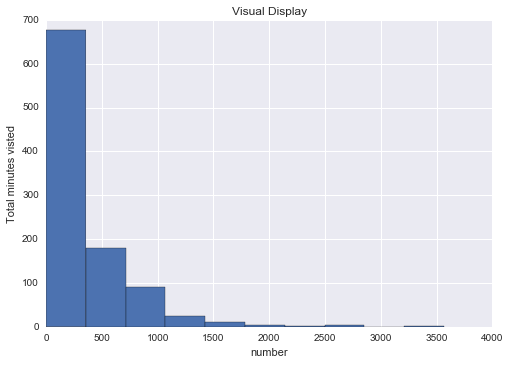

In [51]:
def group_by_acc(data,key1):
    engagement_by_account = defaultdict(list)
    for engagement in data:
        account_key = engagement['account_key']
        engagement_by_account[account_key].append(engagement[key1])
    
    total_counts= {}
    for account_key, engagement_record in engagement_by_account.items():
        total_count = 0
        for point in engagement_record:
            total_count +=point
        total_counts[account_key]= total_count
        
    return total_counts



def draw_hist(x,title1,ylabel1,xlabel1):
    plt.hist(x)
    # Chart title
    plt.title(title1)
    plt.xlabel(xlabel1)
    plt.ylabel(ylabel1)

    

import seaborn as sns
def summarize(all_values, key_value,title,ylabel1,xlabel1):
    print "For ",key_value," "
    print "The Mean Value is              :",np.mean(all_values)
    print "The Standard Deviation Value is:",np.std(all_values)
    print "The Minimum Value is           :",np.min(all_values)
    print "The Maximum Value is           :",np.max(all_values)
    draw_hist(all_values,title,ylabel1,xlabel1)
    print "                                      "
    
       
summarize(  (group_by_acc(paid_engagement_in_first_week,'total_minutes_visited').values()) ,'total_minutes_visted','Visual Display','Total minutes visted','number')


For  have_visited  
The Mean Value is              : 2.86733668342
The Standard Deviation Value is: 2.25519800292
The Minimum Value is           : 0
The Maximum Value is           : 7
                                      


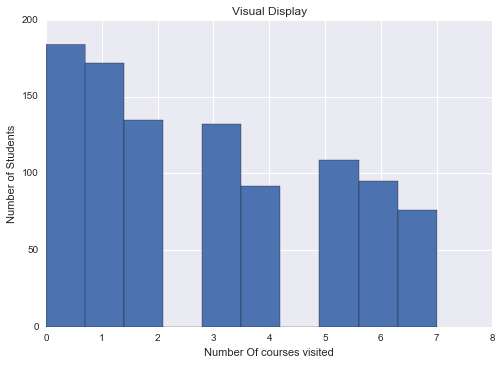

In [53]:
summarize(group_by_acc(paid_engagement_in_first_week,'have_visited').values(),'have_visited','Visual Display','Number of Students','Number Of courses visited')

For  lessons_completed  
The Mean Value is              : 1.63618090452
The Standard Deviation Value is: 3.00256129983
The Minimum Value is           : 0
The Maximum Value is           : 36
                                      


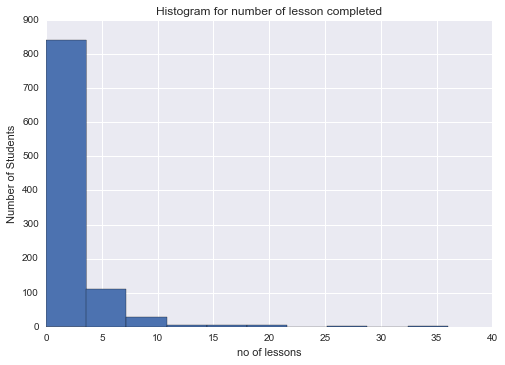

In [55]:
summarize(group_by_acc(paid_engagement_in_first_week,'lessons_completed').values(),'lessons_completed','Histogram for number of lesson completed','Number of Students','no of lessons')

In [56]:

passing_engagement=set()
non_passing_engagement=set() 

subway_project_submission_keys = ['746169184','3176718735']

for data in paid_submissions:
    account_key = data['account_key']
    if data['lesson_key'] in subway_project_submission_keys:
        if data['assigned_rating']== 'UNGRADED' or data['assigned_rating']== 'INCOMPLETE':
            non_passing_engagement.add(account_key)
        else:
            passing_engagement.add(account_key)
            
print len(passing_engagement)
print len(non_passing_engagement)

647
481


In [57]:
passing_engagement1=[]
non_passing_engagement1=[]

for data in paid_engagement_in_first_week:
    if data['account_key'] in passing_engagement:
        passing_engagement1.append(data)
    else:
            non_passing_engagement1.append(data)
                
print len(passing_engagement1)
print len(non_passing_engagement1)

4527
2392


In [59]:
#print "for Passing group"
#summarize(group_by_acc(passing_engagement1,'lessons_completed').values(),'lessons_completed')
#summarize(group_by_acc(passing_engagement1,'total_minutes_visited').values(),'total_minutes_visted')
#summarize(group_by_acc(passing_engagement1,'have_visited').values(),'have_visted')


